# Przetwarzanie Grafiki i Muzyki - laboratorium nr 5

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Zadanie 1 (2 punkty)

Proszę narysować histogramy dla obrazków "LENA_512.jpg" oraz "Statek_640_505.jpg":

  * Narysuj histogram oddzielnie dla R, G, B
  * Narysuj histogram dla szarego zdjęcia

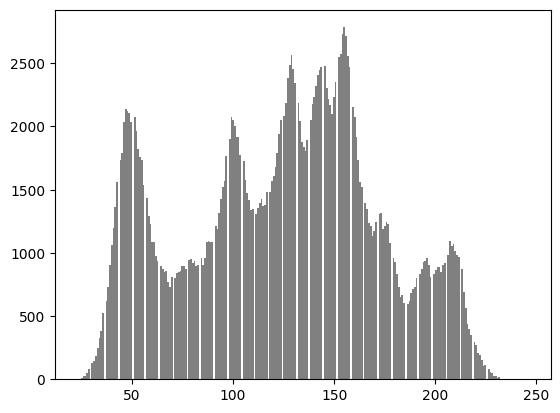

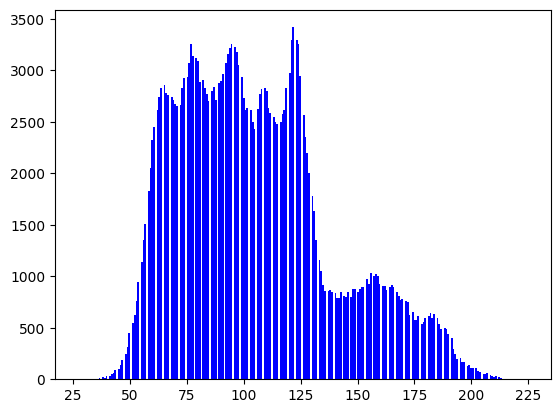

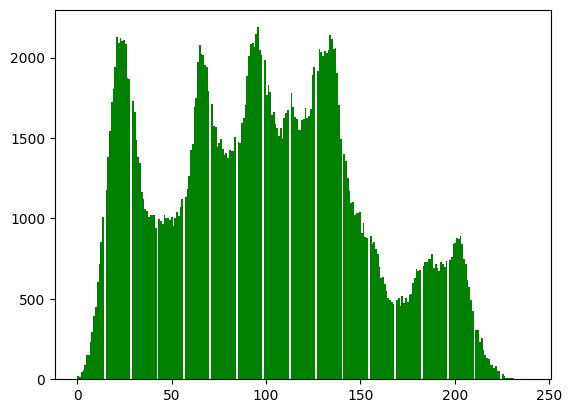

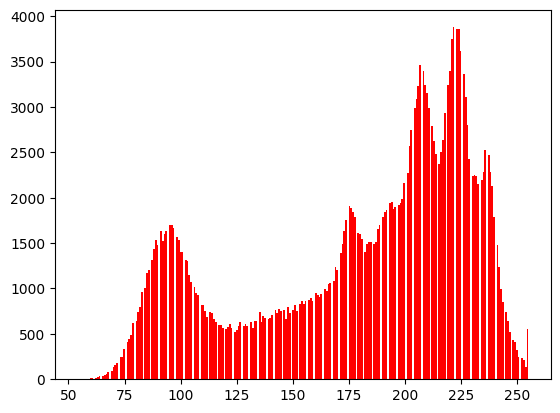

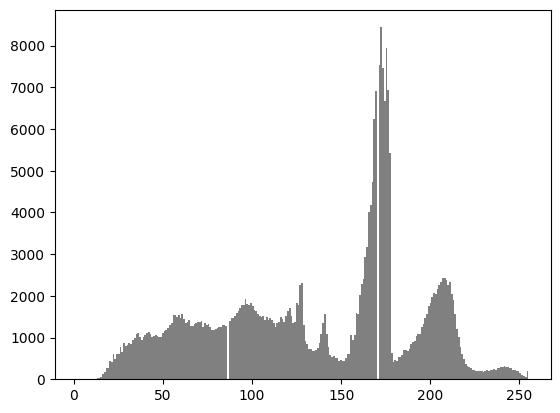

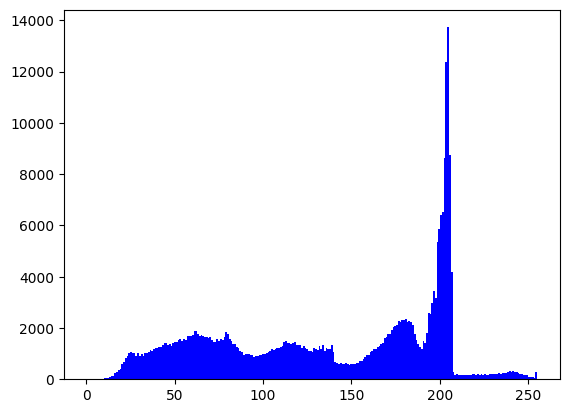

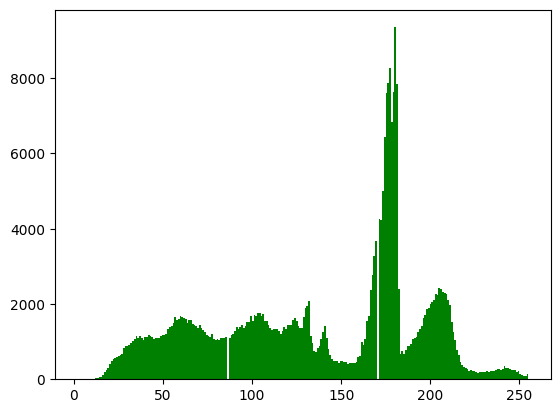

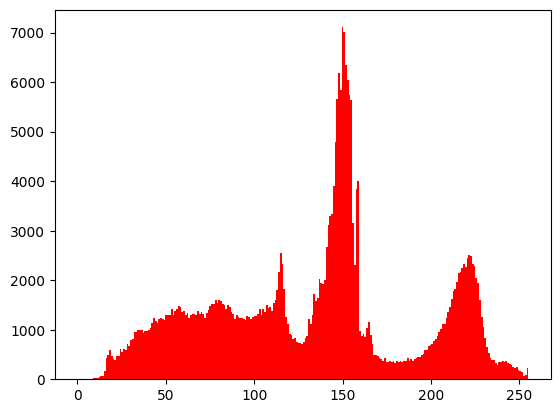

In [16]:
lena = cv2.imread('img/LENA_512.jpg')
lena_gray = cv2.imread('img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)
ship = cv2.imread('img/statek_640_505.jpg')
ship_gray = cv2.imread('img/statek_640_505.jpg', cv2.IMREAD_GRAYSCALE)

def show_hist(img, img_gray):
    plt.figure()
    plt.hist(img_gray.flat, bins=256, color='gray')
    plt.figure()
    plt.hist(img[:,:,0].flat, bins=256, color='blue')
    plt.figure()
    plt.hist(img[:,:,1].flat, bins=256, color='green')
    plt.figure()
    plt.hist(img[:,:,2].flat, bins=256, color='red')

show_hist(lena, lena_gray)
show_hist(ship, ship_gray)

# Zadanie 2 (2 punkty)

Proszę zaimplementować funkcję zmiany kontrastu obrazu.

Wykorzystaj tablicę LUT:

$$
LUT(i) = \left\{ \begin{array}{ll}
0 & \textrm{gdy } a \left(i - \frac{i_{max}}{2} \right)+\frac{i_{max}}{2}<0\\
a \left(i - \frac{i_{max}}{2} \right)+ \frac{i_{max}}{2} & \textrm{gdy } 0 \leq a \left( i - \frac{i_{max}}{2} \right) + \frac{i_{max}}{2} \leq i_{max} \\
i_{max} & \textrm{gdy } a \left( i - \frac{i_{max}}{2} \right)+ \frac{i_{max}}{2}>i_{max} 
\end{array} \right.
$$


Parametr
  * $a<1$ - zmniejszenie kontrastu,
  * $a=1$ - identyczność,
  * $a>1$ - zwiększenie kontrastu.

Uwagi:

  * Proszę zastosować napisaną funkcję do zdjęcia "LENA_512.jpg" i wykonać ją na luminancji (składowa Y z formatu YCbCr) dla $a\in\{0.5, 1, 1.5\}$, a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr (po zrobieniu konwersji z YCbCr na RGB).
  * Porównaj histogramy przed i po ściemnieniu.

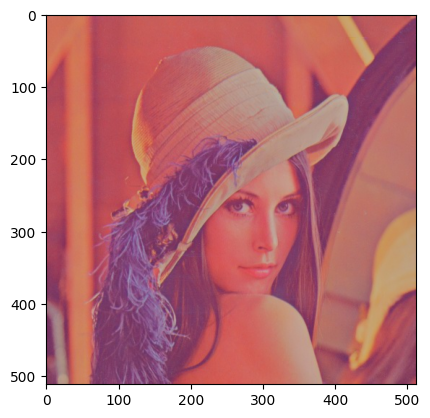

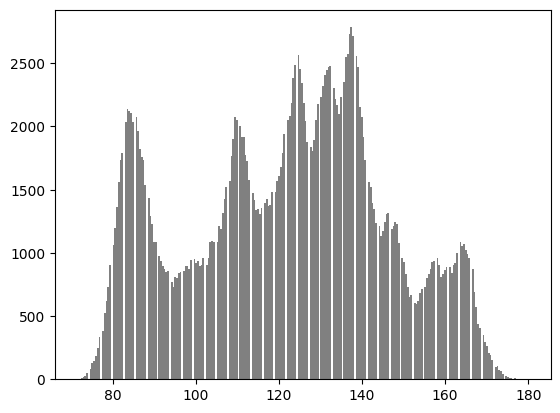

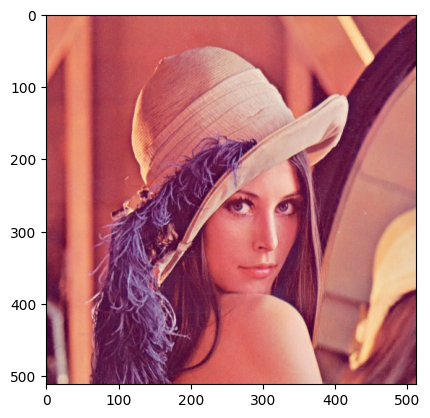

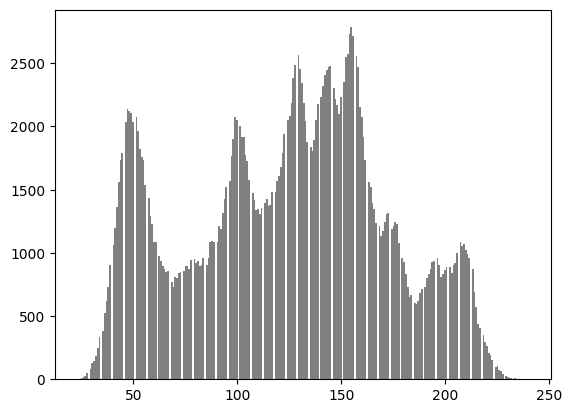

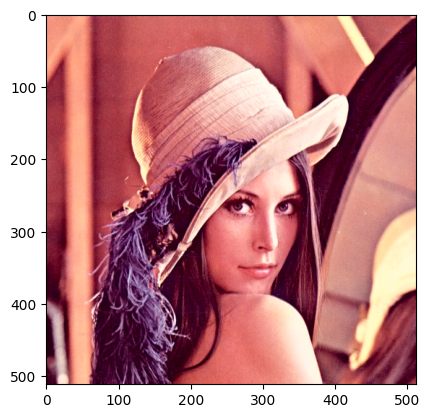

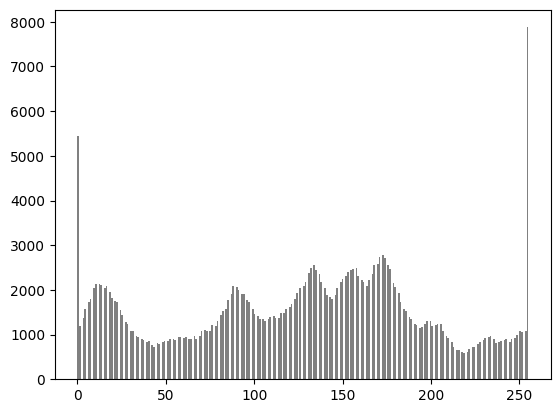

In [34]:
lena = cv2.cvtColor(cv2.imread('img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)

def new_color(a, imax, i):
    ires = a * (i - (imax / 2)) + (imax / 2)
    return max(min(ires, 255), 0)

def get_lut(a):
    lut = dict()
    for i in range(256):
        lut[i] = new_color(a, np.max(lena[:,:,0]), i)
    return lut

def update_show_hist(a):
    lut = get_lut(a)
    lena_copy = lena.copy()
    lena_new = np.vectorize(lut.get)(lena[:,:,0])
    lena_copy[:,:,0] = lena_new
    lena_rgb = cv2.cvtColor(lena_copy, cv2.COLOR_YCrCb2RGB)
    plt.figure()
    plt.imshow(lena_rgb)
    plt.figure()
    plt.hist(lena_new.flat, bins=256, color='gray')
    
update_show_hist(0.5)
update_show_hist(1)
update_show_hist(1.5)
    

## Rozciągnięcie histogramu

## Zadanie 3 (2 punkty)

Proszę zaimplementować funkcję rozciągającą histogram.

Wykorzystaj tablicę LUT:

$$ 
LUT(i)= \frac{i_{max} }{ {v_{max} - v_{min}} } \cdot (i - v_{min})
$$

Parametr:

  * $v_{max}$ oznacza maksymalną wartość składowej w obrazie,
  * $v_{min}$ oznacza minimalną wartość składowej w obrazie,
  * $i_{max}$ oznacza maksymalną możliwą wartość składowej w obrazie.

Uwagi:

  * Proszę zastosować do zdjęcia LENA_512. Proszę wykonać na Luminancji (składowa Y z formatu YCbCr) a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr.
  * Porównaj histogramy przed i po wyrównaniu.



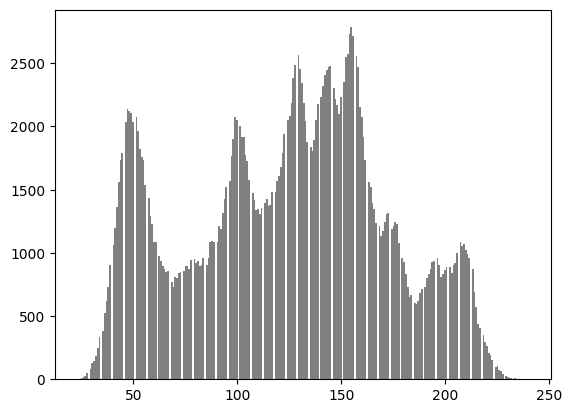

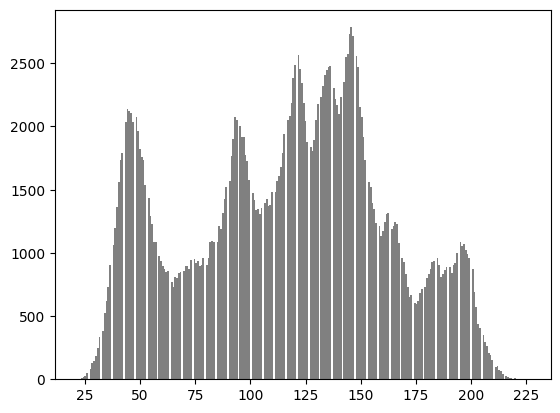

In [37]:
lena = cv2.cvtColor(cv2.imread('img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)

def new_color_2(i, imax, vmax, vmin):
    return (imax/(vmax-vmin))*(i-vmin)

def get_lut_2(vmin, vmax):
    lut = dict()
    for i in range(256):
        lut[i] = new_color_2(i, np.max(lena[:,:,0]), vmax, vmin)
    return lut

def update_show_hist_2(vmin, vmax):
    lut = get_lut_2(vmin, vmax)
    lena_copy = lena.copy()
    lena_new = np.vectorize(lut.get)(lena[:,:,0])
    lena_copy[:,:,0] = lena_new
    plt.figure()
    plt.hist(lena_new.flat, bins=256, color='gray')
    
plt.figure()
plt.hist(lena[:,:,0].flat, bins=256, color='gray')
update_show_hist_2(0, 255)

## Wyrównywanie histogramu

## Zadanie 4 (2 punkty) 

Proszę zaimplementować funkcję wyrównującą histogram.

  * Najpierw stwórz dystrybuantę:

$$
D(n)= \frac{h_0+h_1+ \ldots +h_n }{sum}
$$

gdzie:

$h_n$ - to ilość punktów na obrazie o n-tym poziomie szarości,

$sum$ - to liczba wszystkich punktów obrazu
  
  *  Wykorzystaj tablicę LUT:
$$ 
LUT(i) = \frac{D(i)-D_0}{1-D_0} \cdot (k-1)
$$
				
Parametr

$D_0$ - to pierwsza niezerowa wartość dystrybuanty obrazu źródłowego,

$k$ - to liczba możliwych wartości jasności obrazu (zwykle 256).

Uwagi:

  * Proszę zastosować do zdjęcia LENA_512. Proszę wykonać na Luminancji (składowa Y z formatu YCbCr), a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr.
  * PORÓWNAJ HISTOGRAMY PRZED I PO WYRÓWNANIU.

NameError: name 'new_color' is not defined

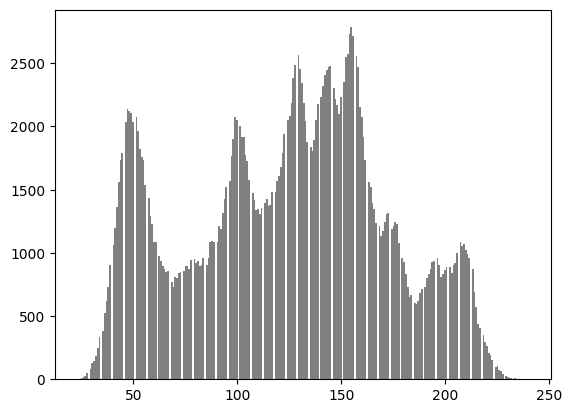

In [21]:
lena = cv2.cvtColor(cv2.imread('img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)

def get_d_dict(n):
    unique, counts = np.unique(lena[:,:,0], return_counts=True)
    d_dict = dict(zip(unique, counts))
    if n in d_dict:
        return d_dict[n] / sum(d_dict.values())
    return 0

def get_d():
    res = {0: get_d_dict(0)}
    for i in range(1, 256):
        res[i] = res[i - 1] + get_d_dict(i)
    return res
    
def new_color_3(i, d, d0):
    return ((d[i] - d0) / (1 - d0)) * 255

def get_lut_3():
    lut = dict()
    d0 = 0
    d = get_d()
    i = 0
    
    while d0 <= 0:
        d0 = d[i]
        i += 1
        
    for i in range(256):
        lut[i] = new_color(i, d, d0)
    return lut

def update_show_hist_3():
    lut = get_lut_3()
    lena_copy = lena.copy()
    lena_new = np.vectorize(lut.get)(lena[:,:,0])
    lena_copy[:,:,0] = lena_new
    plt.figure()
    plt.hist(lena_new.flat, bins=256, color='gray')
    
plt.figure()
plt.hist(lena[:,:,0].flat, bins=256, color='gray')
update_show_hist_3()

# Zadanie 5 (2 punkty)

Proszę zastosować do zdjęcia "kobieta.jpg":

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/kobieta.jpg)

  * Rozciągnięcie histogramu
  * Wyrównywanie histogramu

Uwagi:

  * Przed wykonaniem powyższych operacji narysuj histogram i usuń piki odpowiadające wartością skrajnym (tak by móc rozciągnąć histogram)
  * Proszę wykonać na zdjęciu w odcieniach szarości i RGB. 


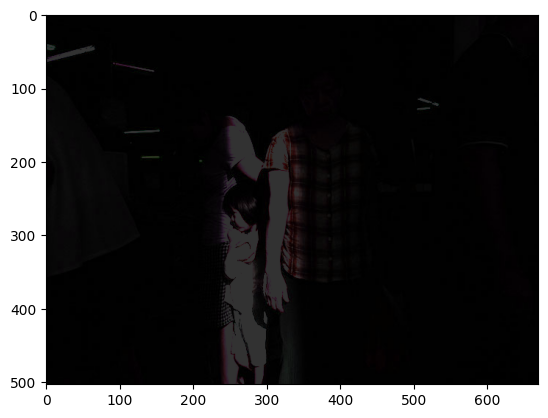

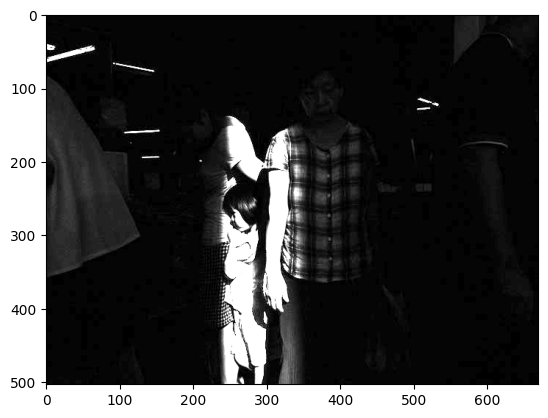

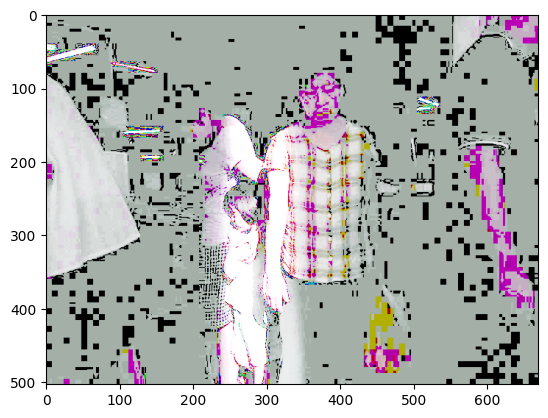

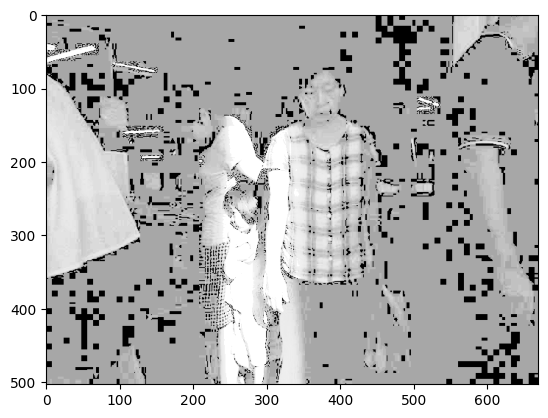

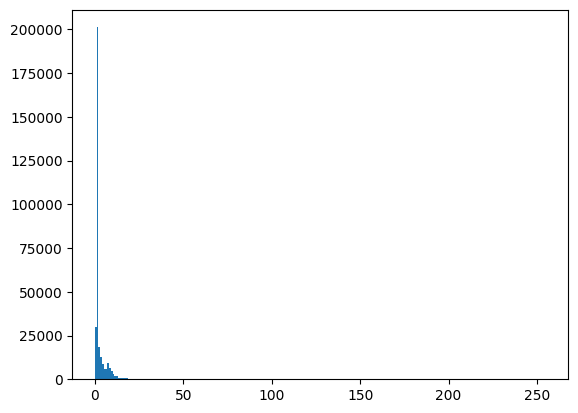

In [24]:
woman = cv2.imread('./img/kobieta.jpg', cv2.IMREAD_COLOR)
woman_gray = cv2.imread('./img/kobieta.jpg', cv2.IMREAD_GRAYSCALE)

def show_hist(img):
    plt.figure()
    plt.hist(img.flat, bins=256)
    
def trim(img, cmax):
    res = img.copy()
    res[img > cmax] = cmax
    return res

def new_color_stretch(i, imax, vmax, vmin):
    return (imax/(vmax-vmin))*(i-vmin)

def get_lut_stretch(img, vmin, vmax):
    lut = dict()
    color_max = np.max(img[:,:])
    for i in range(256):
        lut[i] = new_color_stretch(i, color_max, vmax, vmin)
    return lut

def update_show_img_rgb_stretch(img, vmin, vmax):
    lut1 = get_lut_stretch(img[:,:,0], vmin, vmax)
    lut2 = get_lut_stretch(img[:,:,1], vmin, vmax)
    lut3 = get_lut_stretch(img[:,:,2], vmin, vmax)
    
    img_new_b = np.vectorize(lut1.get)(img[:,:,0]).astype(np.uint8)
    img_new_g = np.vectorize(lut2.get)(img[:,:,1]).astype(np.uint8)
    img_new_r = np.vectorize(lut3.get)(img[:,:,2]).astype(np.uint8)
    
    plt.figure()
    plt.imshow(cv2.merge([img_new_r, img_new_b, img_new_g]))
    
def update_show_img_grey_stretch(img, vmin, vmax):
    lut = get_lut_stretch(img, vmin, vmax)
    img_new = np.vectorize(lut.get)(img[:,:])
    plt.figure()
    plt.imshow(img_new, cmap='grey')
    
    

def get_d_dict_equalize(img, n):
    unique, counts = np.unique(img[:,:], return_counts=True)
    d_dict = dict(zip(unique, counts))
    if n in d_dict:
        return d_dict[n] / sum(d_dict.values())
    return 0

def get_d_equalize(img):
    res = {0: get_d_dict_equalize(img, 0)}
    for i in range(1, 256):
        res[i] = res[i - 1] + get_d_dict_equalize(img, i)
    return res
    
def new_color_equalize(i, d, d0):
    return ((d[i] - d0) / (1 - d0)) * 255

def get_lut_equalize(img):
    lut = dict()
    d0 = 0
    d = get_d_equalize(img)
    i = 0
    
    while d0 <= 0:
        d0 = d[i]
        i += 1
        
    for i in range(256):
        lut[i] = new_color_equalize(i, d, d0)
    return lut

def update_show_img_rgb_equalize(img):
    lut1 = get_lut_equalize(img[:,:,0])
    lut2 = get_lut_equalize(img[:,:,1])
    lut3 = get_lut_equalize(img[:,:,2])
    
    img_new_b = np.vectorize(lut1.get)(img[:,:,0]).astype(np.uint8)
    img_new_g = np.vectorize(lut2.get)(img[:,:,1]).astype(np.uint8)
    img_new_r = np.vectorize(lut3.get)(img[:,:,2]).astype(np.uint8)
    
    plt.figure()
    plt.imshow(cv2.merge([img_new_r, img_new_b, img_new_g]))
    
def update_show_img_grey_equalize(img):
    lut = get_lut_equalize(img)
    img_new = np.vectorize(lut.get)(img[:,:])
    plt.figure()
    plt.imshow(img_new, cmap='grey')

    
woman_gray_trim = trim(woman_gray, 50)
woman_trim = trim(woman, 50)

update_show_img_rgb_stretch(woman_trim, woman_trim.min(), woman_trim.max())
update_show_img_grey_stretch(woman_gray_trim, woman_gray_trim.min(), woman_gray_trim.max())
update_show_img_rgb_equalize(woman_trim)
update_show_img_grey_equalize(woman_gray_trim)

show_hist(woman_gray)